# 任务 3 股价预测小项目（50 分）
我们要做股票的预测，针对于历史数据来预测股价的走势。在这里，我们要解决的具体问题为：给定历史数据来预测 5 天之后的股价。 这个问题是经典的回归问题，所以可以使用线性回归模型来解决。

在这个项目中，需要做如下的几件事情：
1. 读取某一只股票行情数据，并试着理解每一个字段的含义
2. 对于读取之后的数据，做一些必要的预处理（如排序，去掉 NAN，把字符串转换成日期等）
3. 提取特征值和预测值，分别保存为 X, y 两个变量中
4. 把数据分为训练和测试数据
5. 在训练数据中训练模型，在测试数据中测试模型的效果
6. 做简单的可视化展示
7. 分析特征的重要性，这部分可以从学出来的权重获得。

## 3.1数据的读取和数据预处理

In [1]:
import numpy as np  # 数学计算
import pandas as pd  # 数据处理，读取CSV文件（e.g. pd.read_csv)
import matplotlib.pyplot as plt  # 可视化工具
from datetime import datetime as dt  # 时间的工具
from sklearn import preprocessing  # 归一化时用到

In [2]:
# 对于股票数据，你可以使用如下的方法下载某一个公司的股票交易历史
# 000001 为平安银行
# 如果你还没有安装，可以使用 pip install tushare 安装tushare python包
# import tushare as ts
# df = ts.get_hist_data('000001')
# print(df)
# df.to_csv('000001.csv')
# 读取股票代码为000001的行情数据
df = pd.read_csv("D:\\CODE\\Visual_Studio_Code_Python\\Machine_learning\\23.9.20\\000001.csv")

In [3]:
print(np.shape(df))
df.head()

(611, 14)


,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2019/5/30,12.32,12.38,12.22,12.11,646284.62,-0.18,-1.45,12.366,12.390,12.579,747470.29,739308.42,953969.39
1,2019/5/29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95
2,2019/5/28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43
3,2019/5/27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10
4,2019/5/24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98


In [4]:
# 将每一个数据的键值的类型从字符串转为日期，并把date字段设置为index 
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
# TODO：按照时间升序排列数据，使用df中的sort_values函数
df.sort_values('date', inplace=True)
df.head(10)
df.tail(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-05-17,12.92,12.93,12.44,12.36,965000.88,-0.41,-3.19,12.600,12.626,13.411,925681.34,1153473.43,1138638.70
2019-05-20,12.35,12.54,12.38,12.25,786435.19,-0.06,-0.48,12.616,12.577,13.312,934584.83,1021250.17,1127754.97
2019-05-21,12.40,12.73,12.56,12.36,731210.50,0.18,1.45,12.630,12.538,13.223,844307.30,987105.38,1138963.23
2019-05-22,12.57,12.57,12.40,12.32,506230.72,-0.16,-1.27,12.526,12.518,13.107,724755.75,940183.37,1101972.96
2019-05-23,12.24,12.42,12.29,12.14,666855.44,-0.11,-0.89,12.414,12.531,13.014,731146.55,851153.75,1069202.04
2019-05-24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98
2019-05-27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10
2019-05-28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43
2019-05-29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95


In [5]:
# 检测是否有确实数据 NaNs
df.dropna(axis=0, inplace=True)
df.isna().sum()

open            0
high            0
close           0
low             0
volume          0
price_change    0
p_change        0
ma5             0
ma10            0
ma20            0
v_ma5           0
v_ma10          0
v_ma20          0
dtype: int64

In [6]:
min_date = df.index.min()
max_date = df.index.max()
print("First date is", min_date)
print("Last date is", max_date)

First date is 2016-11-29 00:00:00
Last date is 2019-05-30 00:00:00


## 3.2 构建特征向量 X 和预测值 y

In [7]:
# 创建新的一列（预测值）。预测值为5天之后的收盘价（close），使用shift函数来实现。
# TODO:
num = 5 # 预测5天后的情况
df['label'] = df['close'].shift(-5, axis=0) # 数据向下平移5个位置
print(df.shape)

(611, 14)


In [8]:
df.tail(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,label
date,,,,,,,,,,,,,,
2019-05-17,12.92,12.93,12.44,12.36,965000.88,-0.41,-3.19,12.600,12.626,13.411,925681.34,1153473.43,1138638.70,12.35
2019-05-20,12.35,12.54,12.38,12.25,786435.19,-0.06,-0.48,12.616,12.577,13.312,934584.83,1021250.17,1127754.97,12.37
2019-05-21,12.40,12.73,12.56,12.36,731210.50,0.18,1.45,12.630,12.538,13.223,844307.30,987105.38,1138963.23,12.49
2019-05-22,12.57,12.57,12.40,12.32,506230.72,-0.16,-1.27,12.526,12.518,13.107,724755.75,940183.37,1101972.96,12.40
2019-05-23,12.24,12.42,12.29,12.14,666855.44,-0.11,-0.89,12.414,12.531,13.014,731146.55,851153.75,1069202.04,12.22
2019-05-24,12.35,12.45,12.35,12.31,495526.19,0.06,0.49,12.396,12.498,12.928,637251.61,781466.47,1046943.98,NaN
2019-05-27,12.21,12.42,12.37,11.93,1048426.00,0.02,0.16,12.394,12.505,12.824,689649.77,812117.30,1001879.10,NaN
2019-05-28,12.31,12.55,12.49,12.26,880703.12,0.12,0.97,12.380,12.505,12.742,719548.29,781927.80,990340.43,NaN
2019-05-29,12.36,12.59,12.40,12.26,666411.50,-0.09,-0.72,12.380,12.453,12.673,751584.45,738170.10,973189.95,NaN


In [9]:
# 由于数据往前移了5位，所以最后5个样本的label值为“NA”，在这里去掉包含“NA”的样本。
df.dropna(inplace=True)
df.tail(10)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,label
date,,,,,,,,,,,,,,
2019-05-10,12.34,12.75,12.68,12.10,1192399.00,0.52,4.28,12.652,13.357,13.709,1381265.51,1312421.48,1221722.48,12.44
2019-05-13,12.33,12.54,12.30,12.23,741917.75,-0.38,-3.00,12.538,13.143,13.637,1107915.51,1191640.89,1211461.61,12.38
2019-05-14,12.20,12.75,12.49,12.16,1182598.12,0.19,1.54,12.446,12.979,13.585,1129903.46,1198753.07,1237823.69,12.56
2019-05-15,12.58,13.11,12.92,12.57,1103988.50,0.43,3.44,12.510,12.892,13.560,1155611.00,1208209.79,1254306.88,12.40
2019-05-16,12.93,12.99,12.85,12.78,634901.44,-0.07,-0.54,12.648,12.767,13.518,971160.96,1168630.36,1209357.42,12.29
2019-05-17,12.92,12.93,12.44,12.36,965000.88,-0.41,-3.19,12.600,12.626,13.411,925681.34,1153473.43,1138638.70,12.35
2019-05-20,12.35,12.54,12.38,12.25,786435.19,-0.06,-0.48,12.616,12.577,13.312,934584.83,1021250.17,1127754.97,12.37
2019-05-21,12.40,12.73,12.56,12.36,731210.50,0.18,1.45,12.630,12.538,13.223,844307.30,987105.38,1138963.23,12.49
2019-05-22,12.57,12.57,12.40,12.32,506230.72,-0.16,-1.27,12.526,12.518,13.107,724755.75,940183.37,1101972.96,12.40


In [10]:
# 构建特征向量X，也就是数据中的X。由于我们要预测df['label']的值，需要先去掉，不然就失去预测意义了。
# 另外，在本次预测任务中先不考虑"price_change"和"p_change"两个字段。
X = df.drop(['price_change', 'label', 'p_change'], axis=1)
X = X.values
# TODO: 使用z-score normalization做归一化，参考preprocessing模块里的scale函数的使用
scale = preprocessing.StandardScaler().fit(X)
X = scale.transform(X)

In [11]:
# 提取预测值
y = df.label.values

In [12]:
print(np.shape(X), np.shape(y))

(606, 11) (606,)


In [13]:
# 把数据分为训练和测试数据。
# 我们把一开始的550个样本作为训练数据，之后的样本作为测试数据。
X_train, y_train = X[0:550, :], y[0:550]
X_test, y_test = X[550:606, :], y[550:606]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(550, 11) (550,)
(56, 11) (56,)


## 3.3 训练模型

In [14]:
# 训练线性回归模型
# TODO: 导入相应的线性回归库
from sklearn import linear_model
# TODO: 在训练数据上训练线性回归模型
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
lr.score(X_test, y_test) # 使用绝对系数R^2评估模型

0.0493004064838557

## 3.4 可视化结果（预测值 vs 真实值）

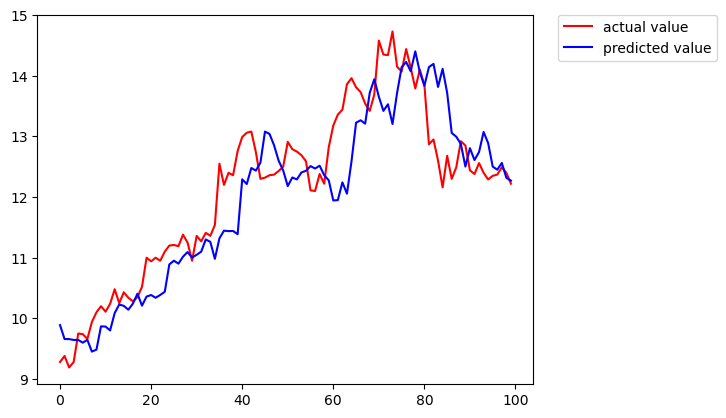

In [16]:
# 输出针对最后五个样本的预测，以及真实值 
x_predict = X[-100:] # 选取最新的100个样本
forcast = lr.predict(x_predict)

plt.plot(y[-100:], color='r', label="actual value")
plt.plot(forcast, color='b', label="predicted value")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

## 3.5 观察模型的权重。在线性回归中，权重（绝对值）越大，就意味着跟预测值之间的关系就越大

In [17]:
# 理解模型，查看哪些特征对结果的影响比较大 
for idx, col_name in enumerate(['open', 'high', 'close', 'low', 'volume', 'ma5','ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20']):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[idx]))

The coefficient for open is -0.7623399996475249
The coefficient for high is 0.8321435171405447
The coefficient for close is 0.2446370537523889
The coefficient for low is 1.091415550493546
The coefficient for volume is 0.004380793756912777
The coefficient for ma5 is -0.307175350194649
The coefficient for ma10 is 0.19354310799475066
The coefficient for ma20 is 0.24902077484698426
The coefficient for v_ma5 is 0.174723364660337
The coefficient for v_ma10 is 0.08873934447969933
The coefficient for v_ma20 is -0.27910702694420786
